In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [13]:
# load All Sales Files
file_loc = "drive/MyDrive/Sales_Data/"
files = [x for x in os.listdir(file_loc)]

In [23]:
# Merging all sales data into a single file
all_data = pd.DataFrame()
for file in files:
  df = pd.read_csv(file_loc + file)
  all_data = pd.concat([all_data, df])
all_data.to_csv("sales_data.csv", index=False)

In [205]:
# Read in updated dataframe
sales_data = pd.read_csv("sales_data.csv")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [206]:
"""
Clean the data - remove all incompatible datas
Removed Datas:
 - NaN
 - Duplicated Columns
 - Convert neccessary Datatypes
"""
nan_df = sales_data[sales_data.isna().any(axis=1)]
sales_data = sales_data.dropna(how="all") # NaN
sales_data = sales_data[sales_data["Order Date"].str[0:2] != "Or"] # Duplicated Columns
sales_data["Quantity Ordered"] = pd.to_numeric(sales_data["Quantity Ordered"]) # To Int
sales_data["Price Each"] = pd.to_numeric(sales_data["Price Each"]) # To Float

In [207]:
# Adding Month Columns
sales_data['Month'] = sales_data["Order Date"].str[0:2]
sales_data["Month"] = sales_data["Month"].astype('int32')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [208]:
## Add Sales Column
sales_data['Sales'] = sales_data["Quantity Ordered"] * sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Best Month for Sales and how much was earned in the following month

In [209]:
# Grouping datas
results = sales_data.groupby("Month").sum()

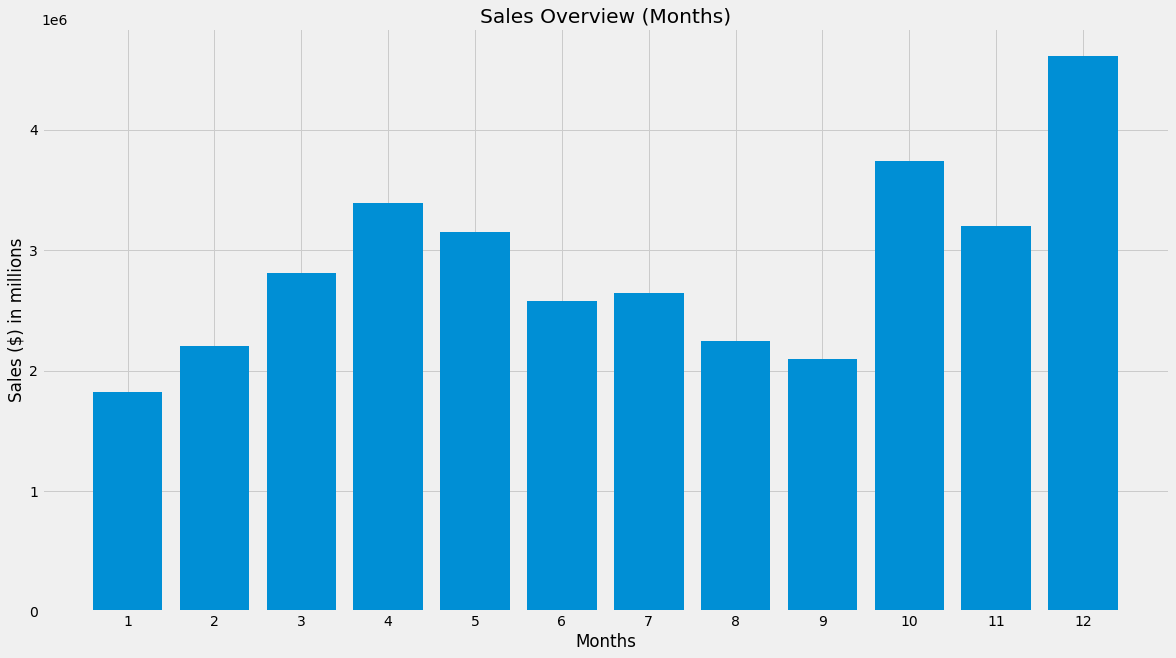

In [210]:
# Plotting the sales overview of each months
months = range(1,13)
plt.figure(figsize=(18,10))
plt.title("Sales Overview (Months)")
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales ($) in millions")
plt.bar(months, results["Sales"])
plt.show()

### City with hightest number of sales

In [211]:
# New Column with City
def get_city(address):
  return address.split(",")[1]

def get_state(address):
  return address.split(",")[2].split(" ")[1]

sales_data["City"] = sales_data['Purchase Address'].apply(lambda x: get_city(x) + ", " + get_state(x))

#Grouping data with city
city_results = sales_data.groupby("City").sum()
cities = [city for city,df in sales_data.groupby("City")]
city_results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06
"Portland, ME",2750,4.471893e+05,17144,4.497583e+05
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06


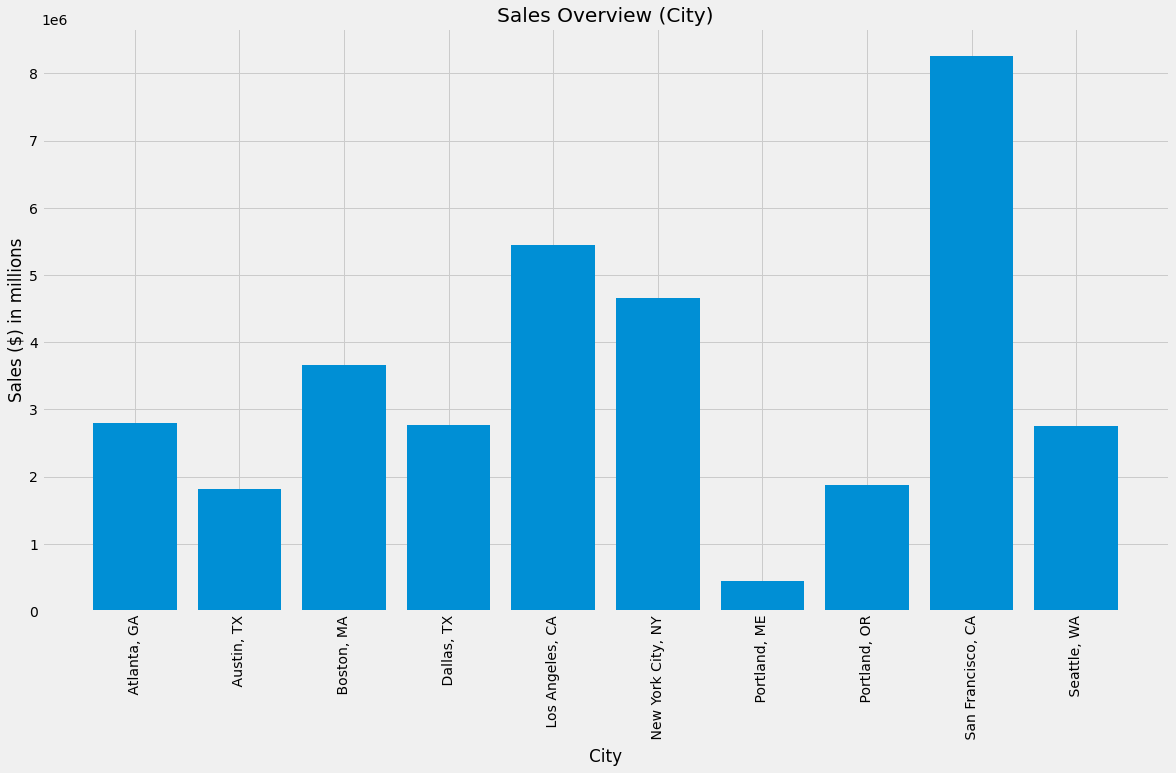

In [212]:
# Plot the sales of city
plt.figure(figsize=(18,10))
plt.title("Sales Overview (City)")
plt.bar(cities, city_results["Sales"])
plt.xticks(cities, rotation="vertical")
plt.xlabel("City")
plt.ylabel("Sales ($) in millions")
plt.show()

### What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [213]:
# Replacing order date into proper pandas datetime
sales_data['Order Date'] = pd.to_datetime(sales_data["Order Date"])

In [214]:
# Add custom time colums
sales_data["Hour"] = sales_data['Order Date'].dt.hour

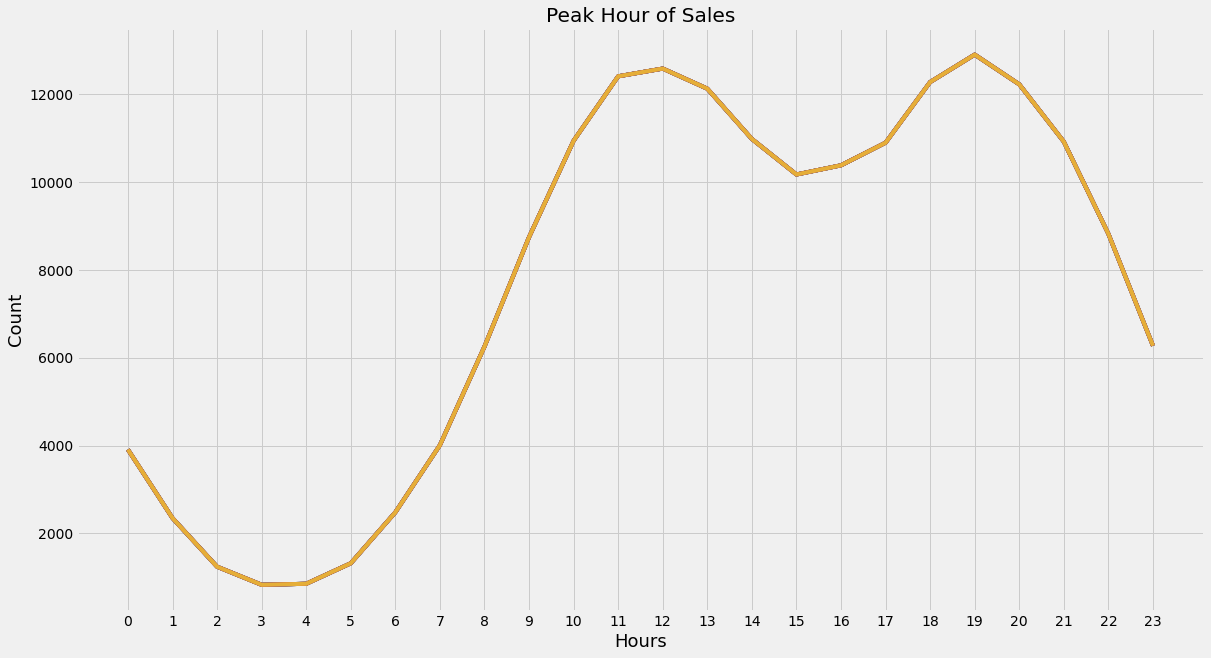

In [245]:
# Group by hours
hours = [hour for hour, df in sales_data.groupby("Hour")]

plt.figure(figsize=(18,10))
plt.title("Peak Hour of Sales")
plt.xticks(hours)
plt.xlabel("Hours", size=18)
plt.ylabel("Count", size=18)
plt.plot(hours, sales_data.groupby("Hour").count())
plt.show()

# Recommended time for advertisement can be around 11 am or 7pm according to the graph

### Products that are often sold together

In [233]:
# New dataframe to keep track of duplicate products and combining them together
df = sales_data[sales_data["Order ID"].duplicated(keep=False)]

df["Grouped"] = df.groupby("Order ID")['Product'].transform(lambda x: ",".join(x))
df = df[['Order ID', "Grouped"]].drop_duplicates()
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [238]:
from itertools import combinations
from collections import Counter

count = Counter()

# Getting most items sold  together
for row in df["Grouped"]:
  row_list = row.split(",")
  count.update(Counter(combinations(row_list, 2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## Products that sold the most?

In [261]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12


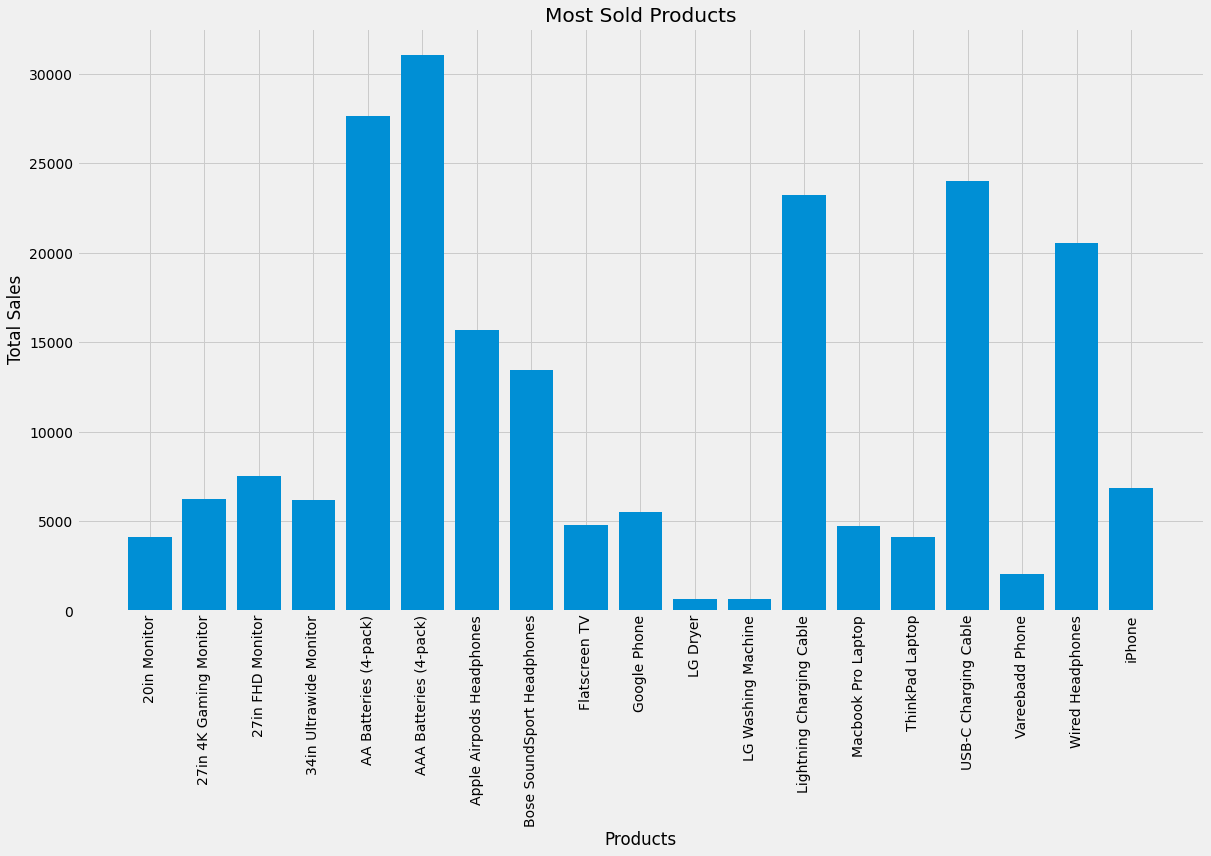

In [259]:
# Group data by products and quantity ordered
product_group = sales_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]
products = [product for product,df in product_group]

# Plotting the graph
plt.figure(figsize=(18,10))
plt.title("Most Sold Products")
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation="vertical")
plt.xlabel("Products")
plt.ylabel("Total Sales")
plt.show()

# Most Ordered/Sold product was AAA Batteries

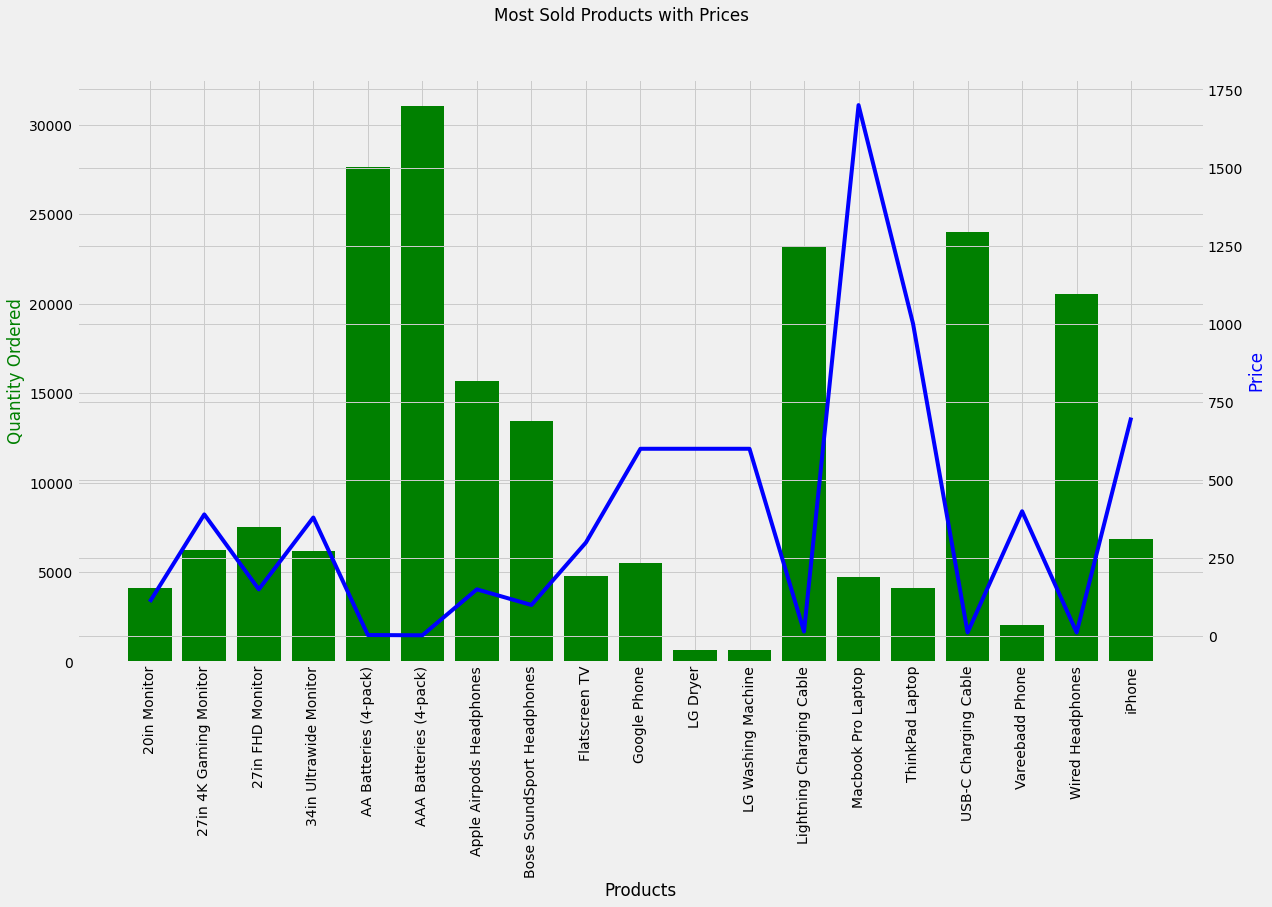

In [278]:
prices = sales_data.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(10)
fig.suptitle("Most Sold Products with Prices")
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, "b")

ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered", color="g")
ax2.set_ylabel("Price", color="b")
ax1.set_xticklabels(products, rotation="vertical")

plt.show()
